In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("new_train.csv",index_col = 'Date', parse_dates = True)

In [3]:
train.head()

,Open-Stock-1,High-Stock-1,Low-Stock-1,Close-Stock-1,VWAP-Stock-1,Volume-Stock-1,Turnover-Stock-1,Open-Stock-2,High-Stock-2,Low-Stock-2,...,VWAP-Stock-4,Volume-Stock-4,Turnover-Stock-4,Open-Stock-5,High-Stock-5,Low-Stock-5,Close-Stock-5,VWAP-Stock-5,Volume-Stock-5,Turnover-Stock-5
Date,,,,,,,,,,,,,,,,,,,,,
2010-06-01,1889.7,1890.00,1838.00,1855.10,1855.75,568273,105457457545000,285.40,285.95,281.50,...,844.44,3878011,327474904340000,1235.0,1238.00,1177.0,1181.70,1197.29,1786082,213845404410000
2010-06-02,1848.0,1862.75,1828.00,1853.05,1842.82,945167,174177161135000,284.00,284.80,279.25,...,838.31,3320996,278403743240000,1195.0,1206.95,1168.5,1201.15,1189.87,1307410,155564994855000
2010-06-03,1864.1,1910.00,1864.10,1905.60,1893.91,679689,128727119355000,283.00,286.85,282.50,...,853.51,2494522,212910342645000,1211.0,1248.00,1211.0,1242.30,1231.63,1482919,182640434320000
2010-06-04,1906.0,1909.80,1880.10,1885.70,1889.21,509435,96242800140000,288.85,291.80,277.00,...,862.85,2963920,255740999120000,1240.0,1258.00,1240.0,1245.45,1249.72,1454459,181767075850000
2010-06-07,1867.0,1894.85,1808.35,1876.65,1873.32,961913,180196832650000,285.00,289.10,285.00,...,839.89,3471483,291567400640000,1218.6,1225.00,1196.0,1214.80,1209.27,1424594,172272511430000


In [4]:
train.isna().sum()

Open-Stock-1        0
High-Stock-1        0
Low-Stock-1         0
Close-Stock-1       0
VWAP-Stock-1        0
Volume-Stock-1      0
Turnover-Stock-1    0
Open-Stock-2        0
High-Stock-2        0
Low-Stock-2         0
Close-Stock-2       0
VWAP-Stock-2        0
Volume-Stock-2      0
Turnover-Stock-2    0
Open-Stock-3        0
High-Stock-3        0
Low-Stock-3         0
Close-Stock-3       0
VWAP-Stock-3        0
Volume-Stock-3      0
Turnover-Stock-3    0
Open-Stock-4        0
High-Stock-4        0
Low-Stock-4         0
Close-Stock-4       0
VWAP-Stock-4        0
Volume-Stock-4      0
Turnover-Stock-4    0
Open-Stock-5        0
High-Stock-5        0
Low-Stock-5         0
Close-Stock-5       0
VWAP-Stock-5        0
Volume-Stock-5      0
Turnover-Stock-5    0
dtype: int64

In [5]:
train['diff_3'] = train['Close-Stock-3'] - train['Open-Stock-3']

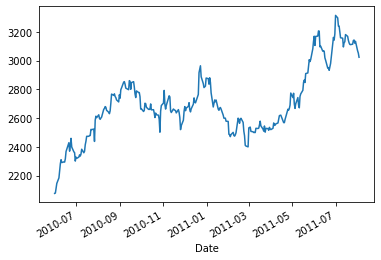

In [6]:
train['Close-Stock-3'].plot()

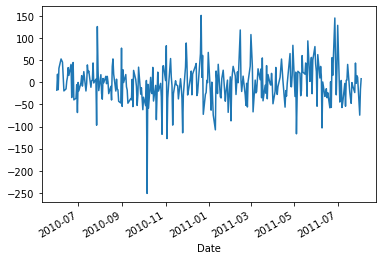

In [7]:
train['diff_3'].plot()

In [8]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(train['Close-Stock-3'])

1. ADF :  -2.2905550054792196
2. P-Value :  0.17503226730798338
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 298
5. Critical Values :
	 1% :  -3.4524859843440754
	 5% :  -2.871288184343229
	 10% :  -2.571964047565425


In [9]:
ad_test(train['diff_3'])

1. ADF :  -16.15260165745488
2. P-Value :  4.5528637641420183e-29
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 298
5. Critical Values :
	 1% :  -3.4524859843440754
	 5% :  -2.871288184343229
	 10% :  -2.571964047565425


In [10]:
#P value not less than 0.05 hence the dataset is not stationary 

In [11]:
train['Close-Stock-3'] = train['Close-Stock-3'].diff()

In [12]:
train['Close-Stock-3']

Date
2010-06-01      NaN
2010-06-02     2.60
2010-06-03    35.05
2010-06-04    31.85
2010-06-07    38.50
              ...  
2011-07-28   -22.15
2011-07-29    13.15
2011-08-01   -66.15
2011-08-02   -15.70
2011-08-03   -28.95
Name: Close-Stock-3, Length: 299, dtype: float64

In [13]:
train = train.dropna()

In [14]:
train['Close-Stock-3']

Date
2010-06-02     2.60
2010-06-03    35.05
2010-06-04    31.85
2010-06-07    38.50
2010-06-08    52.75
              ...  
2011-07-28   -22.15
2011-07-29    13.15
2011-08-01   -66.15
2011-08-02   -15.70
2011-08-03   -28.95
Name: Close-Stock-3, Length: 298, dtype: float64

In [15]:
ad_test(train['Close-Stock-3'])

1. ADF :  -15.861090647374224
2. P-Value :  9.21016868867336e-29
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 297
5. Critical Values :
	 1% :  -3.4525611751768914
	 5% :  -2.87132117782556
	 10% :  -2.5719816428028888


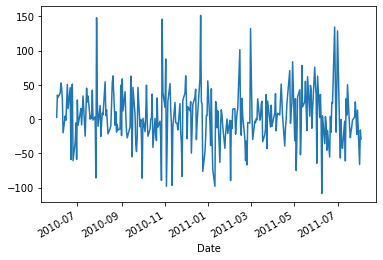

In [16]:
train['Close-Stock-3'].plot()

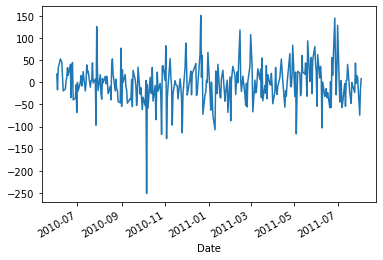

In [17]:
train['diff_3'].plot()

In [18]:
from pmdarima import auto_arima

In [19]:
#Auto arima is going to try diff values for the orders like (0,0,0), (0,0,1) and so on and return the best set of values for orders
stepwise_fit = auto_arima(train['Close-Stock-3'] , trace  = True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3055.075, Time=0.81 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3057.359, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3057.533, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3057.388, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3057.173, Time=0.00 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=3060.537, Time=0.24 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3060.370, Time=0.28 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=3063.884, Time=0.27 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=3057.019, Time=0.52 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3058.948, Time=0.23 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=3062.310, Time=0.32 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=3062.062, Time=0.38 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=3058.197, Time=0.69 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=3054.916, Time=0.53 sec
 ARIMA(1,0,2)(0,0,0)[0]          

In [20]:
stepwise_fit = auto_arima(train['diff_3'] , trace  = True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3112.552, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3113.347, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3113.478, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3111.624, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3114.011, Time=0.39 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.923 seconds


In [21]:
#Goal is to minimise AIC

In [22]:
from statsmodels.tsa.arima_model import ARIMA

In [23]:
train.shape

(298, 36)

In [24]:
train_model = train.iloc[:-30]
test_model = train.iloc[-30:]
print(train_model.shape, test_model.shape)

(268, 36) (30, 36)


In [25]:
model = ARIMA(train_model['Close-Stock-3'], order = (2,0,2))
model = model.fit()
model.summary()

C:\Users\prana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          Close-Stock-3   No. Observations:                  268
Model:                     ARMA(2, 2)   Log Likelihood               -1366.912
Method:                       css-mle   S.D. of innovations             39.612
Date:                Sun, 10 Jan 2021   AIC                           2745.823
Time:                        23:19:45   BIC                           2767.369
Sample:                             0   HQIC                          2754.477
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.5817      1.270      2.032      0.042       0.092       5.071
ar.L1.Close-Stock-3     0.0941      0.085      1.107      0.268      -0.073       0.261
ar.L2.Close-Stock-3     0.8761      0.085     10.319      0.000       0.710       1.043
ma.L1.Close-Stock-3    -0.0575      0.063     -0.919      0.358      -0.180       0.065
ma.L2.Close-Stock-3    -0.9425      0.063    -15.075      0.000      -1.065      -0.820
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0160           +0.0000j            1.0160            0.0000
AR.2           -1.1234           +0.0000j            1.1234            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.0610           +0.0000j            1.0610            0.5000
-----------------------------------------------------------------------------
"""

In [26]:
model_1 = ARIMA(train_model['diff_3'], order = (0,0,0))
model_1 = model_1.fit()
model_1.summary()

C:\Users\prana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 diff_3   No. Observations:                  268
Model:                     ARMA(0, 0)   Log Likelihood               -1395.044
Method:                           css   S.D. of innovations             44.100
Date:                Sun, 10 Jan 2021   AIC                           2794.088
Time:                        23:19:45   BIC                           2801.270
Sample:                             0   HQIC                          2796.973
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2847      2.694     -1.219      0.223      -8.564       1.995
==============================================================================
"""

In [27]:
start=len(train_model)
end=len(train_model)+len(test_model)-1
pred=model.predict(start=start,end=end,typ='levels')
pred.index = train.index[start:end+1]
print(pred)

Date
2011-06-23   -1.437987
2011-06-24    6.836875
2011-06-27   -0.539544
2011-06-28    6.015998
2011-06-29    0.170342
2011-06-30    5.363622
2011-07-01    0.730890
2011-07-04    4.844817
2011-07-05    1.173169
2011-07-06    4.431907
2011-07-07    1.521798
2011-07-08    4.102959
2011-07-11    1.796280
2011-07-12    3.840594
2011-07-13    2.012066
2011-07-14    3.631039
2011-07-15    2.181398
2011-07-18    3.463379
2011-07-19    2.313973
2011-07-20    3.328967
2011-07-21    2.417475
2011-07-22    3.220946
2011-07-25    2.497988
2011-07-26    3.133885
2011-07-27    2.560334
2011-07-28    3.063476
2011-07-29    2.608329
2011-08-01    3.006305
2011-08-02    2.644998
2011-08-03    2.959669
dtype: float64


C:\Users\prana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [28]:
start=len(train_model)
end=len(train_model)+len(test_model)-1
pred_1 =model_1.predict(start=start,end=end,typ='levels')
pred_1.index = train.index[start:end+1]
print(pred_1)


Date
2011-06-23   -3.284701
2011-06-24   -3.284701
2011-06-27   -3.284701
2011-06-28   -3.284701
2011-06-29   -3.284701
2011-06-30   -3.284701
2011-07-01   -3.284701
2011-07-04   -3.284701
2011-07-05   -3.284701
2011-07-06   -3.284701
2011-07-07   -3.284701
2011-07-08   -3.284701
2011-07-11   -3.284701
2011-07-12   -3.284701
2011-07-13   -3.284701
2011-07-14   -3.284701
2011-07-15   -3.284701
2011-07-18   -3.284701
2011-07-19   -3.284701
2011-07-20   -3.284701
2011-07-21   -3.284701
2011-07-22   -3.284701
2011-07-25   -3.284701
2011-07-26   -3.284701
2011-07-27   -3.284701
2011-07-28   -3.284701
2011-07-29   -3.284701
2011-08-01   -3.284701
2011-08-02   -3.284701
2011-08-03   -3.284701
dtype: float64


C:\Users\prana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


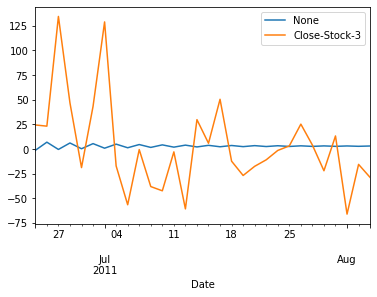

In [29]:
pred.plot(legend = True)
test_model['Close-Stock-3'].plot(legend = True)

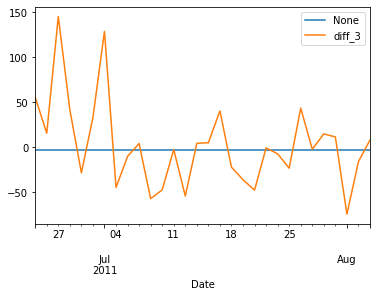

In [30]:
pred_1.plot(legend = True)
test_model['diff_3'].plot(legend = True)

In [31]:
test_model['Close-Stock-3'].mean()

3.0266666666666575

In [32]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test_model['Close-Stock-3'].mean()
rmse=sqrt(mean_squared_error(pred,test_model['Close-Stock-3']))
print(rmse)

45.8376474762767


In [33]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test_model['diff_3'].mean()
rmse=sqrt(mean_squared_error(pred_1,test_model['diff_3']))
print(rmse)

48.48327180061274


In [34]:
test_op = pd.read_csv("new_test.csv",index_col = 'Date', parse_dates = True)
y =model.predict(start= 1,end= 97)
y = y.cumsum()
output = pd.DataFrame(y)
output.to_csv('Stock3.csv', index=False)